# indo_musician_ai_lstm
generate lirik lagu pakai LSTM
<br>
note: lirik lagu yang gak make sense
<br>
dataset: https://www.kaggle.com/datasets/ilmaaliyaf/indonesia-musicians-songs-lyrics
<br>
model yang udah ditrain di notebook ini: https://drive.google.com/file/d/1_zrRKb34xvHOql8nSJ7wc50EFQFkg6yk/view?usp=sharing
<br>
trained textvectorization: https://drive.google.com/file/d/1dN8ZLDlPSFp4j4K9BKiOUMa3QnMj7YxF/view?usp=sharing


In [8]:
!pip install PySastrawi wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 52.6 MB/s eta 0:00:00


In [9]:
import numpy as np 
import pandas as pd 
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
import random
import io
import requests
from bs4 import BeautifulSoup
import concurrent.futures
import csv
from tqdm import tqdm
import pickle
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import tensorflow as tf

2024-10-31 14:09:55.200292: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-31 14:09:55.200426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-31 14:09:55.297111: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-31 14:09:55.496919: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-31 14:09:57.403747: W tensorflow/compiler/tf2

In [10]:
df = pd.read_csv("./indonesian_songs_lyrics.csv")
df.head()

,link,title,artist,lyrics
0,https://lirik.kapanlagi.com/artis/sisi/a-bless...,A Blessing,Sisi,He's my everything... He's my everynight\nFrom...
1,https://lirik.kapanlagi.com/artis/ice-cube/a-b...,A Boy Was Conceived (Intro),Ice Cube,[Keith David]\nOnly three short years after th...
2,https://lirik.kapanlagi.com/artis/ten-2-five/a...,A Brand New Day,Ten 2 Five,A brand new day for you and me\nIn this place ...
3,https://lirik.kapanlagi.com/artis/anggun/a-cha...,A Change,Anggun,NaN
4,https://lirik.kapanlagi.com/artis/showofthehan...,A Kiss Without A Heart With So Much Fun,ShowOfTheHands,NaN


In [11]:
nltk.download('popular')
nltk.download('punkt_tab')

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_words = set(nltk.corpus.stopwords.words('indonesian'))

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [12]:
print("sebelum dropna: ", df.shape[0])
df = df.dropna(subset=['lyrics'])

print("setelah dropna: ", df.shape[0])
df = df.iloc[:15000]
print("setelah kurangi: ", df.shape[0])



sebelum dropna:  22145
setelah dropna:  17996
setelah kurangi:  15000


In [13]:
df["char_num"] = df["lyrics"].apply(len)
df["word_num"] = df.apply(lambda row: nltk.word_tokenize(row["lyrics"]), axis=1).apply(len)

In [14]:
df.describe()

,char_num,word_num
count,15000.000000,15000.000000
mean,705.204800,121.296333
std,408.947723,80.372401
min,12.000000,3.000000
25%,454.000000,74.000000
50%,608.500000,101.000000
75%,852.000000,144.000000
max,9784.000000,1610.000000


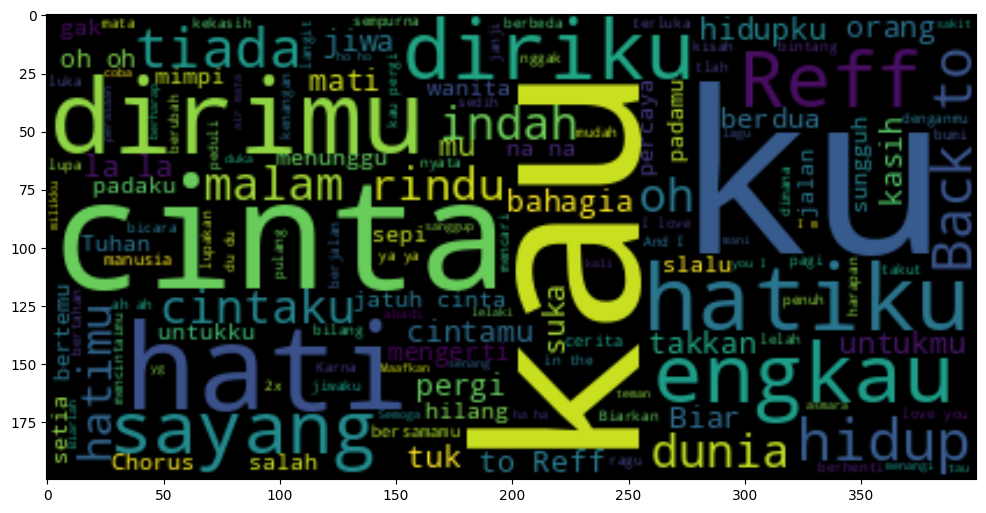

In [15]:
wordcloud = WordCloud(stopwords=stop_words).generate(" ".join(df["lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [16]:
corpus =''
for idx, row in df.iterrows():
    corpus += row["lyrics"] + "\n"
# gak di stemming karena lirik lagu
corpus = corpus.lower() 

In [17]:
print(corpus[60000:62000])

a dirimu terus begitu
aku pulangkan kamu
jahe jahe alala tum jahe jahe
nehi nehi aca aca nehi nehi
jahe jahe alala tum jahe jahe
aca aca aca nehi nehi nehi
alala tum jahe jahe aca aca nehi nehi
aduh biyung inyong ora sudi
bila sifatmu terus begitu
pulang saja kau pulang ke rumah orang tuamu
alala tum jahe jahe aca aca nehi nehi
aduh biyung inyong ora sudi
bila dirimu terus begitu
aku pulangkan kamu
sedang apa, hai manusia di dunia?
resah rasa penuh angan tak terarah
seperti warna dalam ruang bercorak
mewarnai keinginan di kehidupan
acak corak melekat di setiap manusia
hanya mereka yang mendengar dan berubah
di saat waktu membisikkan sebuah pesan
sedang apa, hai manusia di dunia?
resah rasa penuh angan tak terarah
acak corak melekat di setiap manusia
manusia
acak corak melekat mewarnai
dan acak corak melekat di setiap manusia
sedang apa, hai manusia di dunia?
mari marilah kita, mari marilah kita
mencari cinta saja
mari marilah kita, mari marilah kita
daripada makan hati
bukan uang bukan

In [18]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(corpus)

words_exclude_stopword = [w for w in tokens if w not in stop_words]


In [19]:
fdist = nltk.probability.FreqDist(words_exclude_stopword)
print("top 20 kata: ")
fdist.most_common(20)

top 20 kata: 


[('kau', 32767),
 ('ku', 31881),
 ('cinta', 16694),
 ('i', 13093),
 ('you', 11507),
 ('hati', 8715),
 ('to', 7317),
 ('oh', 6888),
 ('the', 6792),
 ('hatiku', 6030),
 ('dirimu', 5932),
 ('reff', 5490),
 ('sayang', 4660),
 ('engkau', 4432),
 ('and', 4392),
 ('diriku', 4391),
 ('me', 4273),
 ('a', 4122),
 ('it', 4012),
 ('s', 4007)]

In [20]:
print(f"jumlah kata unik di corpus {len(set(words_exclude_stopword))}")

jumlah kata unik di corpus 52872


In [21]:
print(set(corpus))

{'…', '+', '7', ')', 'œ', '—', 'b', 'í', 'j', 'õ', 'ï', 'f', '=', 'þ', '\xa0', '¿', 'x', 'ù', '¢', 'ä', '9', 'ì', 'e', '>', '¦', '"', '´', '`', 'ú', 'ß', '/', '“', 'ð', '¬', '\ufeff', '’', 'r', 'ñ', '@', '\t', 't', 'y', '5', ',', '!', '”', '%', 'û', 'é', 'n', 'ô', '\n', 'm', '|', '0', '‘', '²', 'k', '€', 'á', 'w', 'z', '#', 'q', '\x9d', 'v', '2', '8', '*', 'ê', '3', 'ç', 'å', '�', ':', 's', ';', 'î', '™', "'", '¼', 'g', 'ó', 'ö', 'h', '}', '\x7f', 'p', '©', '(', 'c', '.', '_', 'ò', 'æ', 'ü', '„', 'o', 'l', 'ë', '&', '¯', '{', '–', '‚', ' ', '-', 'è', '[', 'ø', '\\', ']', 'a', '6', 'ý', 'i', 'u', 'ã', 'd', '~', 'à', '<', 'â', '?', '1', '»', '4', '\u2028'}


In [22]:

pattern = r"[a-zA-Z\s,\-]+"

matches = re.findall(pattern, corpus)

corpus = ''.join(matches)

print(corpus[60000:62000])

kita, mari marilah kita
mencari cinta saja
mari marilah kita, mari marilah kita
daripada makan hati
bukan uang bukan harta, bukan emas dan pertama
hanyalah cinta yang ku pinta
daripada bersandiwara pura-pura kau setia
ternyata kau wanita serbaguna
astaga masa iya tak percaya
reff
acdc aha ehe benci benci hatiku padamu padanya
duduk berdua canda cumbu bermesraan
acdc aha ehe sakit hatiku padamu padanya
yang ku cinta ternyata engkaulah cinta dunia
acdc aha ehe kau simpan  rese
yang suka gonta-ganti pasangan duh amit-amit deh
nananana nanana nanananana
nananana nanana nanananana
nananana nanana nanananana
nananana nanana nanananana
rap
yeah super nine boys sb
aku merasakan cinta yang ada pada dirimu
dunia terhebat cinta padaku
bahkan ku tahu kau bingung gonta-ganti melulu
dan takkan ragu tuk tetap miliki aku
acdc aha ehe antara cinta dan curiga
mari marilah kita, mari marilah kita
putuskan cinta saja
mari marilah kita, mari marilah kita
daripada makan hati
bukan uang bukan harta, bukan em

In [23]:
print(set(corpus))

{'v', 'r', ' ', 'b', '-', 'j', 'f', '\t', 't', 's', 'y', 'a', ',', '\xa0', 'i', 'n', 'g', 'x', 'h', 'u', 'p', '\n', 'd', 'c', 'm', 'e', 'k', 'w', 'z', 'o', 'l', 'q', '\u2028'}


In [24]:
vocab = sorted(set(corpus))
print(len(vocab))

33


In [25]:
text_vec_layer = tf.keras.layers.TextVectorization(
    split="character",standardize="lower")

2024-10-31 14:10:43.772886: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-31 14:10:44.126005: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-31 14:10:44.126262: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [26]:
print(len(corpus))

10455040


In [27]:
text_vec_layer.adapt([corpus])

In [28]:
text_vec_layer([corpus]).shape

TensorShape([1, 10455040])

In [29]:
encoded = text_vec_layer([corpus])[0]
encoded

<tf.Tensor: shape=(10455040,), dtype=int64, numpy=array([16,  7, 14, ..., 12,  5, 10])>

In [30]:
# ilangin padding & unknown char
encoded -= 2
n_tokens = text_vec_layer.vocabulary_size()-2 
n_tokens

33

In [31]:
dataset_size = len(encoded)
dataset_size

10455040

In [32]:
encoded

<tf.Tensor: shape=(10455040,), dtype=int64, numpy=array([14,  5, 12, ..., 10,  3,  8])>

In [33]:
# import tensorflow as tf
# import tensorflow_datasets as tfds

# BATCH_SIZE = 256
# GPUS = ["GPU:0","GPU:1"]

# strategy = tf.distribute.MirroredStrategy( GPUS )
# print('Number of devices: %d' % strategy.num_replicas_in_sync)

# batch_size = BATCH_SIZE * strategy.num_replicas_in_sync

In [34]:
def to_dataset(sequence,length,shuffle=False,seed=None,batch_size=512):
    ds = tf.data.Dataset.from_tensor_slices(sequence)
    ds = ds.window(length + 1, shift=1,drop_remainder=True)
    ds = ds.flat_map(lambda window_ds: window_ds.batch(length + 1))
    if shuffle:
        ds = ds.shuffle(100_000, seed=seed)
    ds = ds.batch(batch_size)
    return ds.map(lambda window: (window[:, :-1], window[:, 1:])).prefetch(1)

In [35]:
list(to_dataset(text_vec_layer(["untungnya bumi masih berputar"])[0], length=5))

[(<tf.Tensor: shape=(24, 5), dtype=int64, numpy=
  array([[ 6,  4,  9,  6,  4],
         [ 4,  9,  6,  4, 13],
         [ 9,  6,  4, 13,  4],
         [ 6,  4, 13,  4, 21],
         [ 4, 13,  4, 21,  2],
         [13,  4, 21,  2,  3],
         [ 4, 21,  2,  3, 18],
         [21,  2,  3, 18,  6],
         [ 2,  3, 18,  6, 11],
         [ 3, 18,  6, 11,  5],
         [18,  6, 11,  5,  3],
         [ 6, 11,  5,  3, 11],
         [11,  5,  3, 11,  2],
         [ 5,  3, 11,  2, 14],
         [ 3, 11,  2, 14,  5],
         [11,  2, 14,  5, 16],
         [ 2, 14,  5, 16,  3],
         [14,  5, 16,  3, 18],
         [ 5, 16,  3, 18,  7],
         [16,  3, 18,  7, 12],
         [ 3, 18,  7, 12, 19],
         [18,  7, 12, 19,  6],
         [ 7, 12, 19,  6,  9],
         [12, 19,  6,  9,  2]])>,
  <tf.Tensor: shape=(24, 5), dtype=int64, numpy=
  array([[ 4,  9,  6,  4, 13],
         [ 9,  6,  4, 13,  4],
         [ 6,  4, 13,  4, 21],
         [ 4, 13,  4, 21,  2],
         [13,  4, 21,  2,  3],


In [36]:
length = 100
tf.random.set_seed(42)

In [37]:
train_set = to_dataset(encoded[:int(len(encoded)*0.95)], length=length, shuffle=False, seed=42, batch_size=512)
val_set = to_dataset(encoded[int(len(encoded)*0.95):], length=length, shuffle=False, seed=42,batch_size=512)


In [38]:
print(len(encoded[:int(len(encoded)*0.95)]))
print(len(encoded[int(len(encoded)*0.95):]))

9932288
522752


In [39]:
# http://karpathy.github.io/2015/05/21/rnn-effectiveness/

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=n_tokens, output_dim=100),
    tf.keras.layers.LSTM(512,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(512,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(n_tokens,activation="softmax")
])

model.load_weights("./epoch15_indo_musician_ai_512_adam.weights.h5")

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         3300      
                                                                 
 lstm (LSTM)                 (None, None, 512)         1255424   
                                                                 
 dropout (Dropout)           (None, None, 512)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 512)         2099200   
                                                                 
 dropout_1 (Dropout)         (None, None, 512)         0         
                                                                 
 dense (Dense)               (None, None, 33)          16929     
                                                                 
Total params: 3374853 (12.87 MB)
Trainable params: 33748

In [42]:

model_ckpt = tf.keras.callbacks.ModelCheckpoint("indo_musician_ai_512.keras", save_best_only=True, monitor="val_loss")

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)


In [37]:
# import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

In [38]:
# # 5 epochs pertama
# history = model.fit( train_set, validation_data=val_set, epochs=5, callbacks=[model_ckpt, early_stopping_callback], verbose=1)

Epoch 1/5


2024-10-30 17:04:23.028811: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-10-30 17:04:24.032502: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8ec83d4ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-30 17:04:24.032537: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-10-30 17:04:24.048766: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730307864.163588     148 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  19399/Unknown - 1664s 85ms/step - loss: 1.4545 - accuracy: 0.5430

2024-10-30 17:32:01.914184: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4537463534760235045
2024-10-30 17:32:01.914228: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 320373222070858339
2024-10-30 17:32:01.914250: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10472304843898787558


19399/19399 [==============================] - 1737s 89ms/step - loss: 1.4545 - accuracy: 0.5430 - val_loss: 1.2331 - val_accuracy: 0.6019
Epoch 2/5


2024-10-30 17:33:14.523332: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4537463534760235045
2024-10-30 17:33:14.523383: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 320373222070858339
2024-10-30 17:33:14.523400: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10472304843898787558


19399/19399 [==============================] - 1711s 88ms/step - loss: 1.2928 - accuracy: 0.5874 - val_loss: 1.1945 - val_accuracy: 0.6124
Epoch 3/5
19399/19399 [==============================] - 1703s 88ms/step - loss: 1.2534 - accuracy: 0.5985 - val_loss: 1.1780 - val_accuracy: 0.6182
Epoch 4/5
19399/19399 [==============================] - 1696s 87ms/step - loss: 1.2318 - accuracy: 0.6047 - val_loss: 1.1685 - val_accuracy: 0.6215
Epoch 5/5
19399/19399 [==============================] - 1696s 87ms/step - loss: 1.2178 - accuracy: 0.6088 - val_loss: 1.1621 - val_accuracy: 0.6238


In [39]:
model.save_weights("./epoch5_indo_musician_ai_512_adam.weights.h5")

In [40]:
model.save("./epoch5_indo_musician_ai_512_adam.keras")

In [42]:
music_ai_model = tf.keras.Sequential([
    text_vec_layer,
    tf.keras.layers.Lambda(lambda X: X - 2),
    model
])

In [406]:
def next_char(text, temperature=1):
    y_proba = music_ai_model.predict([text], verbose=0)[0, -1:] 
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1)[0, 0]
    return text_vec_layer.get_vocabulary()[char_id + 2]

In [407]:
def generate_text(text, n_chars=50, temperature=0.5):
    for _ in range(n_chars):
        text += next_char(text, temperature)
    return text

In [408]:
tf.random.set_seed(42)

In [409]:
print(generate_text("Belum ada satu bulan", 150, 0.3))

Belum ada satu bulan
karena ku sangat mencintaimu
semua ini kan selalu di hatiku
sebagai kekasihku
aku tak mau terluka
dan selalu mengharapkan dirimu
semoga kau tak perna


In [410]:
print(generate_text("Lembaran foto hitam-putih \n Aku coba ingat lagi warna bajumu kala itu \n Kali pertama di hidupku", 120, 0.1))

Lembaran foto hitam-putih 
 Aku coba ingat lagi warna bajumu kala itu 
 Kali pertama di hidupku
semua yang kau mau
kau tak pernah mengerti
semua yang ku rasa
sebelum kau terus berjalan
tak ada yang mengerti
ku tak m


In [51]:
# # 10 epochs pertama
# history = model.fit( train_set, validation_data=val_set, epochs=5, callbacks=[model_ckpt, early_stopping_callback], verbose=1)

Epoch 1/5
  19399/Unknown - 1623s 84ms/step - loss: 1.2075 - accuracy: 0.6118

2024-10-30 20:01:21.372443: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 13627524759204767324
2024-10-30 20:01:21.372513: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 8038956170930726548
2024-10-30 20:01:21.372524: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 1132289624588354037


19399/19399 [==============================] - 1696s 87ms/step - loss: 1.2075 - accuracy: 0.6118 - val_loss: 1.1566 - val_accuracy: 0.6253
Epoch 2/5


2024-10-30 20:02:33.672263: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 243903308769771333
2024-10-30 20:02:33.672323: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4537463534760235045
2024-10-30 20:02:33.672334: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 320373222070858339
2024-10-30 20:02:33.672338: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 8683903112220405685
2024-10-30 20:02:33.672345: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 1573571965319128390


19399/19399 [==============================] - 1696s 87ms/step - loss: 1.1998 - accuracy: 0.6141 - val_loss: 1.1539 - val_accuracy: 0.6264
Epoch 3/5
19399/19399 [==============================] - 1695s 87ms/step - loss: 1.1945 - accuracy: 0.6156 - val_loss: 1.1472 - val_accuracy: 0.6290
Epoch 4/5
19399/19399 [==============================] - 1697s 87ms/step - loss: 1.1884 - accuracy: 0.6174 - val_loss: 1.1440 - val_accuracy: 0.6303
Epoch 5/5
19399/19399 [==============================] - 1706s 88ms/step - loss: 1.1830 - accuracy: 0.6188 - val_loss: 1.1413 - val_accuracy: 0.6310


In [52]:
model.save_weights("./epoch10_indo_musician_ai_512_adam.weights.h5")

In [53]:
model.save("./epoch10_indo_musician_ai_512_adam.keras")

In [411]:
# Tes hasil Epoch 10
print(generate_text("Belum ada satu bulan", 150, 0.3))

Belum ada satu bulan
dan bila kau tak pernah tahu
sebelum kau mengerti
ku tak sanggup menghadapi
kau kan menjadi milikku
ku berjanji terus berjalan
kau berikan semua ini



In [50]:
# 15 epoch pertama
# history = model.fit( train_set, validation_data=val_set, epochs=5, callbacks=[model_ckpt, early_stopping_callback], verbose=1)

Epoch 1/5


2024-10-31 02:33:18.469816: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ff1200a6350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-31 02:33:18.469863: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-10-31 02:33:18.488795: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730341998.600004     182 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  19399/Unknown - 1664s 86ms/step - loss: 1.1854 - accuracy: 0.6181

2024-10-31 03:00:59.634974: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 5249284444858479300
2024-10-31 03:00:59.635038: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 12519038002202558875
2024-10-31 03:00:59.635043: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 2865204617904340173


19399/19399 [==============================] - 1733s 89ms/step - loss: 1.1854 - accuracy: 0.6181 - val_loss: 1.1399 - val_accuracy: 0.6315
Epoch 2/5


2024-10-31 03:02:08.882381: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 10181331970456167875
2024-10-31 03:02:08.882422: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1951060737953042870
2024-10-31 03:02:08.882424: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 15721090756605551618
2024-10-31 03:02:08.882438: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11205320907649558196


19399/19399 [==============================] - 1734s 89ms/step - loss: 1.1849 - accuracy: 0.6183 - val_loss: 1.1418 - val_accuracy: 0.6311
Epoch 3/5
19399/19399 [==============================] - 1736s 89ms/step - loss: 1.1864 - accuracy: 0.6177 - val_loss: 1.1412 - val_accuracy: 0.6309
Epoch 4/5
19399/19399 [==============================] - 1732s 89ms/step - loss: 1.1905 - accuracy: 0.6164 - val_loss: 1.1500 - val_accuracy: 0.6283
Epoch 5/5
19399/19399 [==============================] - 1749s 90ms/step - loss: 1.1973 - accuracy: 0.6144 - val_loss: 1.1460 - val_accuracy: 0.6296


In [51]:
model.save_weights("./epoch15_indo_musician_ai_512_adam.weights.h5")

In [52]:
model.save("./epoch15_indo_musician_ai_512_adam.keras")

In [68]:
music_ai_model = tf.keras.Sequential([
    text_vec_layer,
    tf.keras.layers.Lambda(lambda X: X - 2),
    model
])

In [69]:
def temperature_sample(text, temperature=1):
    
    y_proba = music_ai_model.predict([text], verbose=0)[0, -1:]
    y_proba = tf.squeeze(y_proba)
    
    preds = np.asarray(y_proba).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    char_id =  np.argmax(probas)
    return text_vec_layer.get_vocabulary()[char_id + 2]


In [70]:
def generate_text(text, n_chars=50, temperature=0.5):
    for _ in range(n_chars):
        text += temperature_sample(text, temperature)
    return text

In [162]:
def text_from_ids(idx):
    text = ""
    for idd in idx:
        text += text_vec_layer.get_vocabulary()[idd+2]
    return text

In [267]:
def next_char_preds(preds, temperature=1):
    # (1,100, 33)
    # y_proba = music_ai_model.predict([text])[0, -1:] # batch 1, seq paling kanan
    text = ""
    next_pred_seqs =  preds[0]
    char_ids = []
    print("next predss: ", next_pred_seqs)
    for y_proba in next_pred_seqs[0:]:
        y_proba = tf.expand_dims(y_proba, 0)
        rescaled_logits = tf.math.log(y_proba) / temperature
        char_id = tf.random.categorical(rescaled_logits, num_samples=1)[0, 0]
        char_ids.append(char_id.numpy())
        text += text_vec_layer.get_vocabulary()[char_id + 2]
    return text, char_ids

In [270]:
for input_example_batch, target_example_batch in train_set.take(1):
    # print("tes: ", input_example_batch)
    print("Input: ", input_example_batch[0].numpy()) # Lets use only the first sequence on the batch
    print("\n input shape: ", input_example_batch[0].numpy().shape)
    example_batch_predictions = model(tf.constant([input_example_batch[0].numpy()]))
    print("\n pred: ", example_batch_predictions)
    print("\n pred shape: ",example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")
    text, next_char_ids = next_char_preds(example_batch_predictions)
    print("\n  pred text:", text)
    print("\n char_ids preds: ", next_char_ids)
    print("\n target: ", target_example_batch.numpy()[0])
    print("\n target shape: ", target_example_batch.numpy()[0].shape)
    print("\nInput:\n", text_from_ids(input_example_batch[0]))
    print("\n  target in text: " , text_from_ids(target_example_batch.numpy()[0])) # many to many sequence (100 seq)

    

Input:  [14  5 12  1  9 19  1  5 26  5 10 19  7 14  3  2 11  1 14  5 12  1  9 19
  1  5 26  5 10 19  2  3 11 14  7  8 24 10 18  9  1  7 14  5  1 12 18 10
 10 18 22 12  1 18 24  1  9 19  1 16 10 18  6  5  2 14  5  0 10  7  8  3
  1 22  3 12 14  1  7 14  0  7  1  3  1 21 18  4 13 15  1 12  7  0 19  1
  7 18  2  3]

 input shape:  (100,)

 pred:  tf.Tensor(
[[[2.82892793e-01 3.52805644e-01 3.69381136e-03 ... 1.04884784e-07
   9.49292023e-09 7.60200625e-10]
  [2.01149359e-02 4.30350989e-01 1.07595645e-01 ... 8.63848891e-06
   2.38917641e-09 2.86645974e-09]
  [2.75160186e-02 6.42366171e-01 2.51106569e-03 ... 2.83971175e-08
   1.04330836e-10 6.73338260e-11]
  ...
  [3.61628918e-04 8.45099330e-01 2.08831131e-02 ... 1.39661538e-09
   3.90693033e-12 6.44060055e-13]
  [2.02165160e-04 1.98808662e-03 7.10360473e-05 ... 3.76428923e-11
   3.36989247e-12 5.97547931e-14]
  [1.59232091e-04 1.93379194e-04 2.68841948e-04 ... 2.80662888e-08
   7.37676018e-08 6.08405470e-12]]], shape=(1, 100, 33), dtype=fl

In [120]:
def save_plot_loss(H, path):
    print("min val_loss: ", min(H.history["val_loss"]))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H.history["loss"], label="train_loss")
    plt.plot(H.history["val_loss"], label="val_loss")

    plt.title("Training Loss ")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(path)

    
def save_plot_acc(H, path):
    print("max val_accuracy: " , max(H.history["val_accuracy"]))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H.history["accuracy"], label="train_acc")
    plt.plot(H.history["val_accuracy"], label="val_acc")
    plt.title(" Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(path)

## eval
The perplexity is a metric that measures how well a probability model predicts a sample and it is commonly used to evaluate language models. It is defined as: 


$$ = -\frac{1}{N}{{\sum_{i=1}^{N}{\log P(w_i| w_1,...,w_{i-1})}}} $$

<br>
pakai df.loc[15000:]  <br>
todo scrape: <br>
- https://lirik.kapanlagi.com/artis/bernadya


In [82]:
def perplexity(y_true, y_pred):
    # https://classic.d2l.ai/chapter_recurrent-neural-networks/rnn.html
    sparse_cross_entropy_loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
    
    perplexity_value = tf.exp(tf.reduce_mean(sparse_cross_entropy_loss))
    
    return perplexity_value


In [83]:
def perplexity_loss(sparse_cross_entropy_loss):
    # https://classic.d2l.ai/chapter_recurrent-neural-networks/rnn.html
    perplexity_value = tf.exp(sparse_cross_entropy_loss)
    
    return perplexity_value


In [84]:
def perplexity_cara_2(y_true,  y_pred):
    target_one_hot =  tf.one_hot(y_true, y_pred.shape[-1])
    log_p = np.sum(tf.math.log(y_pred) * target_one_hot, axis = -1)
    log_ppx = np.exp(-np.mean(log_p))
    return log_ppx

In [457]:
!pip install lxml

In [48]:
import time
def get_html(link):
  
    res = requests.get(link, headers={"User-Agent" : "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36"}).content
    return BeautifulSoup(res, 'html.parser')

def get_songs():
    songs_id = []
    i = 1
    link = f'https://lirik.kapanlagi.com/artis/bernadya' 

    if str(requests.head(link).status_code) == '200':
        
        soup = get_html(link)

        link_elements = soup.find_all("a", class_="lia")

        links = []
        song_lyrics = []

        for link in link_elements:
            href = link.get('href')
            if href and "bernadya" in href:
                links.append(href)

        for link in links:
            response_lirik = requests.get(link)
            response_lirik.raise_for_status()  # Check if request was successful

            soup_lirik = BeautifulSoup(response_lirik.text, 'html.parser')
            lyrics_elements = soup_lirik.find_all("span", class_="lirik_line")

            lyrics = ""

            for line in lyrics_elements:
                lyrics += line.get_text() + "\n"
            title = link.split("/")[5]
            print(f"title: {title}")
            
            song_lyrics.append({
                'link': link,
                'artist': "bernadya",
                "title": title,
                "lyrics": lyrics,
            })
            
        
    
    return song_lyrics


song_lyrics = get_songs()


title: ambang-pintu
title: apa-mungkin
title: berlari
title: kata-mereka-ini-berlebihan
title: kini-mereka-tahu
title: kita-kubur-sampai-mati
title: lama-lama
title: masa-sepi
title: satu-bulan
title: sialnya-hidup-harus-tetap-berjalan
title: sinyal-sinyal
title: terlintas
title: untungnya-hidup-harus-tetap-berjalan


In [49]:
print(song_lyrics[-1])
print(song_lyrics[-1]["lyrics"])

{'link': 'https://lirik.kapanlagi.com/artis/bernadya/untungnya-hidup-harus-tetap-berjalan/', 'artist': 'bernadya', 'title': 'untungnya-hidup-harus-tetap-berjalan', 'lyrics': 'Persis setahun yang lalu\nKu dijauhkan dari yang tak ditakdirkan untukku\nYang kuingat saat itu\nYang kulakukan hanya menggerutu angkuh\nLebih percaya cara-caraku\nPilih ragukan rencana Sang Maha Penentu\nUntungnya, bumi masih berputar\nUntungnya, ku tak pilih menyerah\nUntungnya, ku bisa rasa\nHal-hal baik yang datangnya belakangan\nAda waktu-waktu\nHal buruk datang berturut-turut\nSemua yang tinggal, juga yang hilang\nSeberapa pun absurdnya pasti ada makna\nUntungnya, bumi masih berputar\nUntungnya, ku tak pilih menyerah\nItu memang paling mudah\nUntungnya, kupilih yang lebih susah\nUntungnya, kupakai akal sehat\nUntungnya, hidup terus berjalan\nUntungnya, ku bisa rasa\nHal-hal baik yang datangnya belakangan\nUntungnya, untungnya\nHidup harus tetap berjalan\n'}
Persis setahun yang lalu
Ku dijauhkan dari yang tak

In [51]:
df_bernadya = pd.DataFrame.from_dict(song_lyrics) 
df_bernadya

,link,artist,title,lyrics
0,https://lirik.kapanlagi.com/artis/bernadya/amb...,bernadya,ambang-pintu,[Verse 1]\nPerpisahan yang cukup dingin di awa...
1,https://lirik.kapanlagi.com/artis/bernadya/apa...,bernadya,apa-mungkin,Arungi malam\nTerjaga kala semua tlah terbenam...
2,https://lirik.kapanlagi.com/artis/bernadya/ber...,bernadya,berlari,Seperti yang telah kuduga\nTujuh hari menghila...
3,https://lirik.kapanlagi.com/artis/bernadya/kat...,bernadya,kata-mereka-ini-berlebihan,Ku tak pernah ikat rambutku lagi semenjak kaub...
4,https://lirik.kapanlagi.com/artis/bernadya/kin...,bernadya,kini-mereka-tahu,Dari dulu kulebih-lebihkan semua\nPadahal yang...
5,https://lirik.kapanlagi.com/artis/bernadya/kit...,bernadya,kita-kubur-sampai-mati,"[Verse 1]\nHening, sepanjang perjalanan pulang..."
6,https://lirik.kapanlagi.com/artis/bernadya/lam...,bernadya,lama-lama,Berusaha tetap terjaga\nTunggu kamu selesaikan...
7,https://lirik.kapanlagi.com/artis/bernadya/mas...,bernadya,masa-sepi,[Verse 1]\nRasa ini datang lagi\nNamamu belum ...
8,https://lirik.kapanlagi.com/artis/bernadya/sat...,bernadya,satu-bulan,Belum ada satu bulan\nKu yakin masih ada sisa ...
9,https://lirik.kapanlagi.com/artis/bernadya/sia...,bernadya,sialnya-hidup-harus-tetap-berjalan,Ini yang takkan kautahu\nBetapa beratnya malam...


In [53]:
df_2 = pd.read_csv("./indonesian_songs_lyrics.csv")

df_test = df_2.iloc[15000:]
print(df_test.shape)
df_test.head()

(7145, 4)


,link,title,artist,lyrics
15000,https://lirik.kapanlagi.com/artis/search/pawana/,Pawana,Search,Bermula sebuah cerita\nDi zaman dulu kala\nMud...
15001,https://lirik.kapanlagi.com/artis/siti-nurhali...,Pawana Sampaikanlah Rasa,Siti Nurhaliza,Orang berbangsa\nPancarnya telus ke hati\nOran...
15002,https://lirik.kapanlagi.com/artis/happy-asmara...,Pawang Cinta,Happy Asmara,kadung jeru tresnoku kanggo awakmu\nkabeh wis ...
15003,https://lirik.kapanlagi.com/artis/vidi-aldiano...,Payphone (Cover),Vidi Aldiano,I'm at a payphone trying to call home\nAll of ...
15004,https://lirik.kapanlagi.com/artis/ana-fitria/p...,Payung Batu,Ana Fitria,Soko kangenku\nAku teko neng kutomu\nNggowo ke...


In [56]:
frames = [df_bernadya, df_test]

df_test = pd.concat(frames)

print(df_test.shape[0])
df_test.head()

7184


,link,artist,title,lyrics
0,https://lirik.kapanlagi.com/artis/bernadya/amb...,bernadya,ambang-pintu,[Verse 1]\nPerpisahan yang cukup dingin di awa...
1,https://lirik.kapanlagi.com/artis/bernadya/apa...,bernadya,apa-mungkin,Arungi malam\nTerjaga kala semua tlah terbenam...
2,https://lirik.kapanlagi.com/artis/bernadya/ber...,bernadya,berlari,Seperti yang telah kuduga\nTujuh hari menghila...
3,https://lirik.kapanlagi.com/artis/bernadya/kat...,bernadya,kata-mereka-ini-berlebihan,Ku tak pernah ikat rambutku lagi semenjak kaub...
4,https://lirik.kapanlagi.com/artis/bernadya/kin...,bernadya,kini-mereka-tahu,Dari dulu kulebih-lebihkan semua\nPadahal yang...


In [57]:
df_test = df_test.dropna(subset=['lyrics'])

corpus_test =''
for idx, row in df_test.iterrows():
    
    corpus_test += row["lyrics"] + "\n"
# gak di stemming karena lirik lagu
corpus_test = corpus_test.lower() 

In [58]:
print(len(corpus_test))
corpus_test = corpus_test[:1000000]
print(len(corpus_test))

pattern = r"[a-zA-Z\s,\-]+"

matches = re.findall(pattern, corpus_test)

corpus_test = ''.join(matches)

print(corpus_test[60000:60100])

4154045
1000000
sudah lama kutunggu kamu
menemani hariku
hapus luka di hatiku
reff 
bagaimana ku mengungkap cinta
ji


In [59]:
encoded_test = text_vec_layer([corpus_test])[0]
encoded_test

<tf.Tensor: shape=(987362,), dtype=int64, numpy=array([28,  7, 12, ...,  5, 17,  6])>

In [60]:
encoded_test -= 2
encoded_test

<tf.Tensor: shape=(987362,), dtype=int64, numpy=array([26,  5, 10, ...,  3, 15,  4])>

In [65]:
test_set = to_dataset(encoded_test[:], length=length, shuffle=False, seed=42, batch_size=512)


In [66]:
loss, accuracy = model.evaluate(test_set)

2024-10-31 14:21:21.195258: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


1929/1929 [==============================] - 252s 129ms/step - loss: 1.1492 - accuracy: 0.6260


2024-10-31 14:25:29.364254: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15016145430406720403
2024-10-31 14:25:29.364324: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15595529222836369652
2024-10-31 14:25:29.364358: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7846869017441885564


In [85]:
print("perplexity: ", perplexity_loss(loss))

perplexity:  tf.Tensor(3.1556082, shape=(), dtype=float32)


In [86]:
print(generate_text("Lembaran foto hitam-putih \n Aku coba ingat lagi warna bajumu kala itu \n Kali pertama di hidupku", 700, 0.4))

Lembaran foto hitam-putih 
 Aku coba ingat lagi warna bajumu kala itu 
 Kali pertama di hidupku
sebagai seorang pengecut bersama
bukan terbang terbang menuju kepala
semua kenangan yang tak terbatas
ku tak mampu tuk mengerti dirimu
aku tak mampu untuk mengerti
semua yang terjadi
kau yang selalu ku cinta
kau tak pernah menyayangiku
sebelum kau mengerti
sebelum kau bersedih
sebelum kita bersama
dan kini ku pasti
kau tak mungkin lagi
ku tak ingin menyatu
di dalam hatiku
mengapa kau tak mengerti
apa yang terjadi
kau tak mengerti
dan mengerti aku
selamanya
kau mencintaiku
semua ini
sebuah kisah cinta
yang kan ku jaga
perasaan yang kau beri
sesungguhnya tercipta
aku tak mengerti
kau menyayangiku
senyum manismu
sayang cintaku selalu
terangi dalam terang
terbang melayang
dan kau telah menghila


In [87]:
print(generate_text("Belum ada satu bulan", 700, 0.4))

Belum ada satu bulan
bersama dengan sebuah jawaban
sebagai satu di hati yang tak berarti
di saat ku berpaling darimu
sebuah cinta yang dulu pernah kau terima
seandainya kau mengerti aku sebuah cinta yang selama ini
kau buatku berharap padamu sepenuh hati
mengapa kau tak bisa mengerti aku
selamanya terdalam sebuah cinta
semua yang kau punya
berbagai kasih sayang
semua yang kau pernah pergi
ku tak mau mengerti
mengapa kau berada
bila kau tak tahu
kau bilang aku tak bisa
bersama selalu
selamanya
aku tak bisa tuk menghadapimu
kembali ke reff
kau tak pernah menyerah
selamanya
selalu ku dambakan
dalam anganku menjadi sebuah kisah cinta
sebelum kau tak di sisiku
ku mencintaimu
terasa menjadi berat tak pernah ku menger


In [88]:
print(generate_text("Untungnya, bumi masih berputar\nUntungnya, ku tak pilih menyerah", 700, 0.4
                   ))

Untungnya, bumi masih berputar
Untungnya, ku tak pilih menyerah
aku tak bisa mengatakan
tak mampu ku mengerti semua ini
kan ku berikan semua yang terjadi
dan aku tak mampu bertahan
dan tak mudah berpisah
sebentar saja ku terbawa
tak seperti yang ku mau
aku selalu mencintaimu
mereka berhenti hidup tanpa sebuah kisah kita
aku tak mampu untuk menangis di hatimu
sebelum ku pergi dari semua kenangan
terus berjalan di hatimu
tersenyum mengalir dalam hidupku
ku tak mampu bertahan
kau tak pernah berhenti
ku tak mampu menemukan semua hari ini
kau dan aku telah menghancurkan semua
sebagai berita pun menghadapi ku tak menyerah
dan tak kan mungkin ku terus mencintaimu
sebelum kau tinggalkan aku
teruslah berharap kau kan selalu di hatiku
semoga kau tak pernah menger


In [89]:
print(generate_text("Kukira takkan ada kendala\nKukira inikan mudah", 700, 0.4))

Kukira takkan ada kendala
Kukira inikan mudah tuk mengganti
kau curi cara berdua dengannya
sampai kapan ku merasakan kehidupanku
sebagai satu keindahan yang ku rasa
kau tak mengerti aku dan kamu sebelum kau mengerti
karena aku sudah tak sanggup lagi
ku tak bisa menjadi milikmu
sebenarnya kau terjatuh dariku
setelah kau mengerti
semua yang ku rasa
aku tak mau tak mengerti
apa yang ku mau
ku kan slalu mengerti
apa yang kau mau
ku mencintaimu
terima kasih sayang
ku tak mau bila kau mengerti
ku selalu mengharap kau dan aku
ku tak mampu menghilang ke dalam hatiku
dan ku sadari semua rasa ini
semua yang ku berikan untuk selamanya
aku tak mau tak mungkin tuk bertemu
tak akan terulang lagi
ku tak ingin kau lepaskan aku
sebelum kau bersamaku ta


In [90]:
print(generate_text("Apa mungkin caraku bicara\nApa mungkin caraku tertawa", 700, 0.4))

Apa mungkin caraku bicara
Apa mungkin caraku tertawa
selamanya
ku tak kuasa selalu ada
di saat ku terpesona
tak ada yang tahu ku disini
semua ku kenang semua ini
sebuah cinta sejati
tak selamanya ku tak mampu
dari semua kenangan yang tlah berlalu
sebelum kau tinggalkan aku
ku tak mau aku terbang tinggi mengenangmu
sebelum kau menyayangiku
ku tak mau tahu semua ini
kau tak mengerti aku
selamanya
sendiri tanpa dirimu
ku tak pernah menyayangimu
semua yang kau cinta
satu untukku
setiap ku mencintaimu
dan ku tak pernah tahu
sebelum kau pergi
tak pernah ku berikan semua cinta ini
sebelum ku terluka
di dalam hidupku
tak ada kata yang ku rasa
semua ini terjadi
ku tak bisa menjadi bahagia
yang menyakitkan hatiku
mengapa kau tak mau mengerti
ku tak mau


In [93]:
# mungkin kalau pakai transformer decoder lebih masuk akal liriknya

In [119]:
# save & load disk

In [91]:
model.save("indo_musician_ai_lstm.keras")

In [109]:
# https://stackoverflow.com/questions/65103526/how-to-save-textvectorization-to-disk-in-tensorflow
pickle.dump({'config': text_vec_layer.get_config(),
             'weights': text_vec_layer.get_weights()}
            , open("tv_layer.pkl", "wb"))


In [112]:

from_disk = pickle.load(open("tv_layer.pkl", "rb"))
text_vec_layer_disk = tf.keras.layers.TextVectorization.from_config(from_disk['config'])
# You have to call `adapt` with some dummy data (BUG in Keras)
text_vec_layer_disk.adapt(tf.data.Dataset.from_tensor_slices(["xyz"]))
text_vec_layer_disk.set_weights(from_disk['weights'])

In [113]:
model_coba = tf.keras.models.load_model("indo_musician_ai_lstm.keras")

In [114]:
model_coba.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         3300      
                                                                 
 lstm (LSTM)                 (None, None, 512)         1255424   
                                                                 
 dropout (Dropout)           (None, None, 512)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 512)         2099200   
                                                                 
 dropout_1 (Dropout)         (None, None, 512)         0         
                                                                 
 dense (Dense)               (None, None, 33)          16929     
                                                                 
Total params: 3374853 (12.87 MB)
Trainable params: 33748

In [115]:
music_ai_model_coba = tf.keras.Sequential([
    text_vec_layer_disk,
    tf.keras.layers.Lambda(lambda X: X - 2),
    model_coba
])

In [116]:
def temperature_sample_coba(text, temperature=1):
    
    y_proba = music_ai_model_coba.predict([text], verbose=0)[0, -1:]
    y_proba = tf.squeeze(y_proba)
    
    preds = np.asarray(y_proba).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    char_id =  np.argmax(probas)
    return text_vec_layer.get_vocabulary()[char_id + 2]


In [117]:
def generate_text_coba(text, n_chars=50, temperature=0.5):
    for _ in range(n_chars):
        text += temperature_sample(text, temperature)
    return text

In [118]:
print(generate_text_coba("Apa mungkin caraku bicara\nApa mungkin caraku tertawa", 700, 0.4))

Apa mungkin caraku bicara
Apa mungkin caraku tertawa
ku ingin kau tahu kau tak mampu mengerti
biarkan aku tuk menjadi teman bersamamu
semua ku sayang kamu
ku ingin kau mengerti aku
katakan sebuah kesempatan tuk mencintaimu
tak seperti yang kau mau kau dan aku
karena kamu selalu menunggu
sampai akhir hidupku ini
kau selalu ada di hatiku
tak akan terulang lagi
ku tak akan pernah bersamamu
semua ini menyayangimu
seperti kamu tak semudah itu
karena kamu selalu mengharapkanku
bila kau tak kuat mengerti semua ini
kau tak pernah bisa
biarkan aku mengerti semua ini
aku tak sanggup lagi
menjadi sebuah mimpi
maafkan aku yang terbaik untukmu
semua yang terjadi kau tak pernah menyakiti
karena ku tak mampu mengharapkanmu
terlalu berarti di hatiku
ku tak b


In [121]:
# save embedding buat visualiasi

In [144]:
# gak penting liat character
# embedding_layer = model.layers[0]
# embedding_weights = embedding_layer.get_weights()[0]
# print(embedding_weights.shape)
# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# vocabulary = text_vec_layer.get_vocabulary()[2:] # gak pake UNK & padding
# print(vocabulary)
# print(len(vocabulary))
# for word_num in range(0, len(vocabulary)):
#     word_name = vocabulary[word_num]
#     print(f"{word_name}")
#     word_embedding = embedding_weights[word_num]
    
#     if word_num == 30:
#         out_m.write("\t" + "\n")
#     elif word_num == 31:
#         out_m.write("\xa0" + "\n")
#     elif word_num == 32:
#         out_m.write("\u2028" + "\n")
#     else:
#         out_m.write(word_name + "\n")

#     out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")
# out_v.close()
# out_m.close()